In [40]:
# Cleaning the data
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd
import numpy as np
from collections import Counter
import sys
reload(sys)
sys.setdefaultencoding('utf8')

inputDF = pd.read_csv('listings_copenhagen.csv')
inputDF=inputDF[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
inputDF = inputDF[inputDF.bathrooms >0]
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.beds > 0]
inputDF = inputDF[inputDF.price  > 0]
inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.reviews_per_month > 0]
inputDF = inputDF[inputDF.accommodates  > 0]
inputDF.head()
summaryDF = inputDF[['summary','review_scores_rating']]
summaryDF = summaryDF[pd.notnull(summaryDF['summary'])]
summaryDF = summaryDF[summaryDF['summary']!=0]
summaryDF = summaryDF.sort_values('review_scores_rating',ascending=[True])
top100DF = summaryDF.head(100)
top100DF.head()

In [41]:
summaryDF = inputDF[['summary','review_scores_rating']]
summaryDF = summaryDF[pd.notnull(summaryDF['summary'])]
summaryDF = summaryDF[summaryDF['summary']!=0]
summaryDF = summaryDF.sort_values('review_scores_rating',ascending=True)
top100DF = summaryDF.head(100)
top100DF.head()
print len(inputDF)

15877

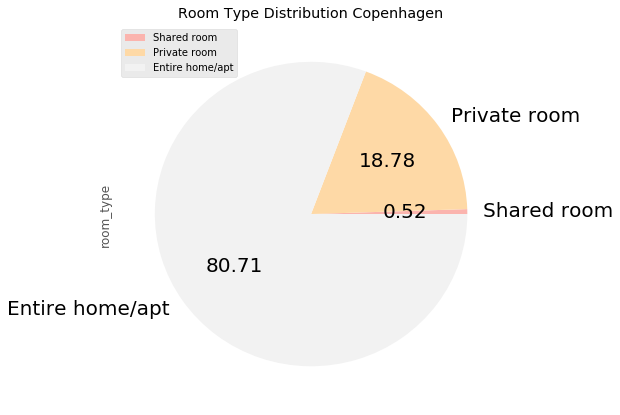

In [42]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

room = inputDF.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Pastel1', 
                 figsize=(7,7), 
                 fontsize = 20, autopct = '%.2f',
                 legend = True,
                 title = 'Room Type Distribution Copenhagen')

In [43]:
top100DF.head()
inputDF.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,11703409,Big cozy apartment in a quiet area,Big cozy apartment located only 15 min away fr...,12.502234,55.677090,The size of the space is big a cozy and can be...,Big cozy apartment located only 15 min away fr...,f,0,Frederiksberg,...,Entire home/apt,4,1.0,1.0,1.0,1.30,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",moderate,16,589.0
1,16300314,Copenhagen apartment for your Copenhagen vacation,Lejligheden er placeret et stenkast fra Flinth...,12.504190,55.687740,0,Lejligheden er placeret et stenkast fra Flinth...,t,0,Frederiksberg,...,Entire home/apt,4,1.0,1.0,2.0,0.49,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",moderate,1,497.0
3,17309528,Big and cozy apt. with central location,"Modern apartment close to central Copenhagen, ...",12.519949,55.680156,The apartment has a spacious and bright living...,"Modern apartment close to central Copenhagen, ...",f,The apartment has a very central location. Wit...,Frederiksberg,...,Entire home/apt,4,1.5,2.0,3.0,2.02,"{TV,""Wireless Internet"",""Wheelchair accessible...",flexible,7,848.0
4,16864730,Modern appartment in City center,Wonderful Frederiksberg appartment with french...,12.539700,55.680226,0,Wonderful Frederiksberg appartment with french...,t,0,Frederiksberg,...,Entire home/apt,4,1.0,1.0,1.0,0.62,"{TV,Internet,""Wireless Internet"",Kitchen,""Pets...",flexible,3,702.0
5,13766533,"Spacious, light apartment in the Copenhagen heart",The spacious and bright apartment in the most ...,12.544956,55.676798,0,The spacious and bright apartment in the most ...,t,0,Frederiksberg,...,Entire home/apt,2,1.0,1.0,1.0,1.09,"{""Wireless Internet"",Kitchen,""Free parking on ...",flexible,12,450.0


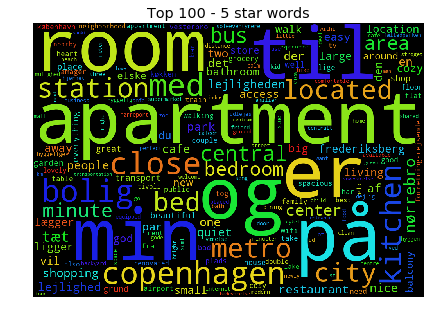

In [44]:
words=''
for index,row in top100DF.iterrows():
    words += row['summary']
    
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(final_words)
plt.figure(figsize=(7,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Top 100 - 5 star words")
plt.show()

In [45]:
# Cleaning the data

import pandas as pd
import numpy as np
from collections import Counter

inputDF = pd.read_csv('listings_new_york.csv')
inputDF=inputDF[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
inputDF = inputDF[inputDF.bathrooms >0]
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.beds > 0]
inputDF = inputDF[inputDF.price  > 0]
inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.reviews_per_month > 0]
inputDF = inputDF[inputDF.accommodates  > 0]
inputDF.head()
summaryDF = inputDF[['summary','review_scores_rating']]
summaryDF = summaryDF[pd.notnull(summaryDF['summary'])]
summaryDF = summaryDF[summaryDF['summary']!=0]
summaryDF = summaryDF.sort_values('review_scores_rating',ascending=[0])
top100DF = summaryDF.head(100)
top100DF.head()

,summary,review_scores_rating
1,1 private bedroom and bathroom available for o...,100.0
15758,Louis ' place New York,100.0
15728,Welcome to my little oasis in the heart of NYC...,100.0
36946,"Beautiful, sunny one bedroom penthouse apartme...",100.0
15733,Walk up studio in East Village 7 minutes from ...,100.0


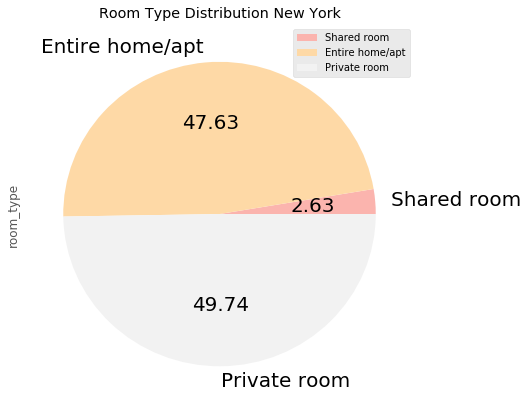

In [46]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

room = inputDF.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Pastel1', 
                 figsize=(7,7), 
                 fontsize = 20, autopct = '%.2f',
                 legend = True,
                 title = 'Room Type Distribution New York')

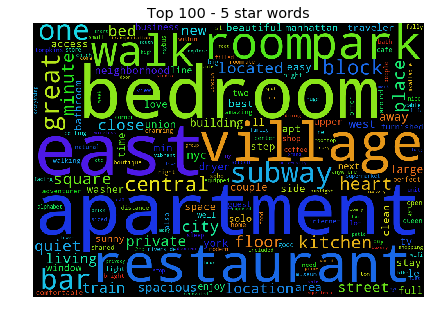

In [47]:
words=''
for index,row in top100DF.iterrows():
    words += row['summary']
    
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(final_words)
plt.figure(figsize=(7,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Top 100 - 5 star words")
plt.show()

In [48]:
len(inputDF)
inputDF.head()

,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
1,20702398,Quiet house on City Island,1 private bedroom and bathroom available for o...,-73.786509,40.849191,0,1 private bedroom and bathroom available for o...,f,This neighborhood is dope! Lot's of seafood re...,City Island,...,Private room,2,1.0,1.0,1.0,2.00,"{""Wireless Internet"",""Air conditioning"",Kitche...",moderate,2,50.0
2,6627449,Large 1 BDRM in Great location,This ground floor apartment is light and airy ...,-73.786609,40.849775,"We are close to fishing, boating, biking, hors...",This ground floor apartment is light and airy ...,f,City Island is a unique and a hidden gem of Ne...,City Island,...,Entire home/apt,3,1.0,1.0,1.0,0.77,"{TV,Internet,""Wireless Internet"",""Air conditio...",strict,21,125.0
5,5557381,Quaint City Island Home,"Located in an old sea-shanty town, our home ha...",-73.789328,40.850024,You won't find a place so close to the city (N...,"Located in an old sea-shanty town, our home ha...",t,"City Island is unique in two ways. First, you ...",City Island,...,Private room,4,1.0,1.0,1.0,3.27,"{Internet,""Wireless Internet"",""Air conditionin...",moderate,94,69.0
6,19609887,Sweet Getaway,"Getaway for two (2) or up to seven (7), nice s...",-73.789304,40.851980,"$150 first two guests per night, $25 each add...","Getaway for two (2) or up to seven (7), nice s...",f,"If you enjoy seafood, City Island is the place...",City Island,...,Entire home/apt,7,1.0,2.0,5.0,1.58,"{TV,""Air conditioning"",Kitchen,""Free parking o...",flexible,3,150.0
7,7949480,City Island Sanctuary BR & Private Bath w Parking,Relax on City Island in our quiet guest room w...,-73.788680,40.852054,"On parle français et anglais, (lire le françai...",Relax on City Island in our quiet guest room w...,f,City Island is a unique sanctuary in New York ...,City Island,...,Private room,2,1.0,1.0,1.0,1.49,"{""Cable TV"",""Wireless Internet"",""Air condition...",moderate,31,101.0


In [9]:
# Cleaning the data

import pandas as pd
import numpy as np
from collections import Counter

inputDF = pd.read_csv('listings_sydney.csv')
inputDF=inputDF[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
inputDF = inputDF[inputDF.bathrooms >0]
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.beds > 0]
inputDF = inputDF[inputDF.price  > 0]
inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.reviews_per_month > 0]
inputDF = inputDF[inputDF.accommodates  > 0]
inputDF.head()
summaryDF = inputDF[['summary','review_scores_rating']]
summaryDF = summaryDF[pd.notnull(summaryDF['summary'])]
summaryDF = summaryDF[summaryDF['summary']!=0]
summaryDF = summaryDF.sort_values('review_scores_rating',ascending=[0])
top100DF = summaryDF.head(100)
top100DF.head()

,summary,review_scores_rating
24037,The house overlooks the majestic Hawkesbury & ...,100.0
17501,Close to many of the good things Marrickville ...,100.0
7582,A lovely one bedroom unit with private balcony...,100.0
7581,This is a 5 bedroom house with 3 bathrooms. We...,100.0
7579,"What more could you want? Beach, shops and tra...",100.0


In [10]:
len(inputDF)

15437

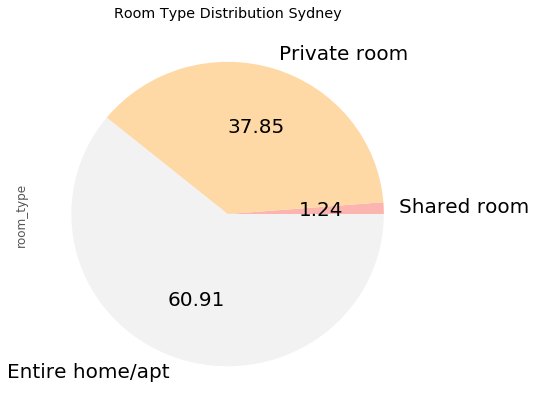

In [11]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

room = inputDF.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Pastel1', 
                 figsize=(7,7), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution Sydney')

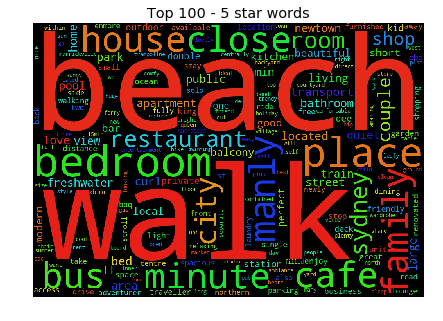

In [14]:
words=''
for index,row in top100DF.iterrows():
    words += row['summary']
    
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(final_words)
plt.figure(figsize=(7,7))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Top 100 - 5 star words")
plt.show()

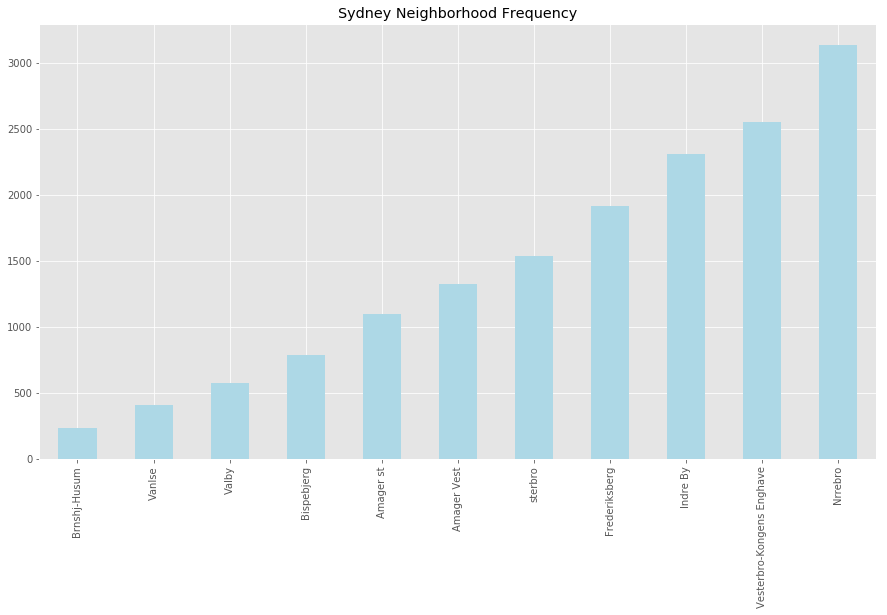

In [39]:
# using Counter to analyze frequency of each listing based on neighborhood
nh = Counter(inputDF['neighbourhood_cleansed'])
nh_df = pd.DataFrame.from_dict(nh, orient='index').sort_values(by=0)
nh_df.plot(kind='bar', 
           color = 'LightBlue', 
           figsize =(15,8), 
           title = 'Sydney Neighborhood Frequency', 
           legend = False)